In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 as db
import matplotlib as mpl
import matplotlib.pyplot as plt
import plotly.io as pio
import plotly.express as px

In [2]:
con = db.connect(r'C:\Users\kolcz\Documents\ds_salaries_kunskapskontroll_3_Nikki\Data_sicence_SQL.db')

In [3]:
cur = con.cursor()

print('Database connected!')

Database connected!


In [4]:
cur.execute('SELECT AVG(salary_in_usd), AVG(salary_in_sek) FROM salaries')
avg_usd, avg_sek = cur.fetchone()
print(f'Average salary: ${avg_usd:,.2f} | {avg_sek:,.2f} SEK') 

Average salary: $137,570.39 | 1,514,484.91 SEK


In [5]:
cur.execute('SELECT MAX(salary_in_usd), MIN(salary_in_usd), MAX(salary_in_sek), MIN(salary_in_sek) FROM salaries')
max_usd, min_usd, max_sek, min_sek = cur.fetchone()

print(f'Highest salary: ${max_usd:,.2f} | {max_sek:,.2f} SEK')
print(f'Lowest salary: ${min_usd:,.2f} | {min_sek:,.2f} SEK')

Highest salary: $450,000.00 | 4,953,960.00 SEK
Lowest salary: $5,132.00 | 56,497.00 SEK


In [6]:
df = pd.read_sql('SELECT company_location, salary_in_usd, salary_in_sek FROM salaries', con)

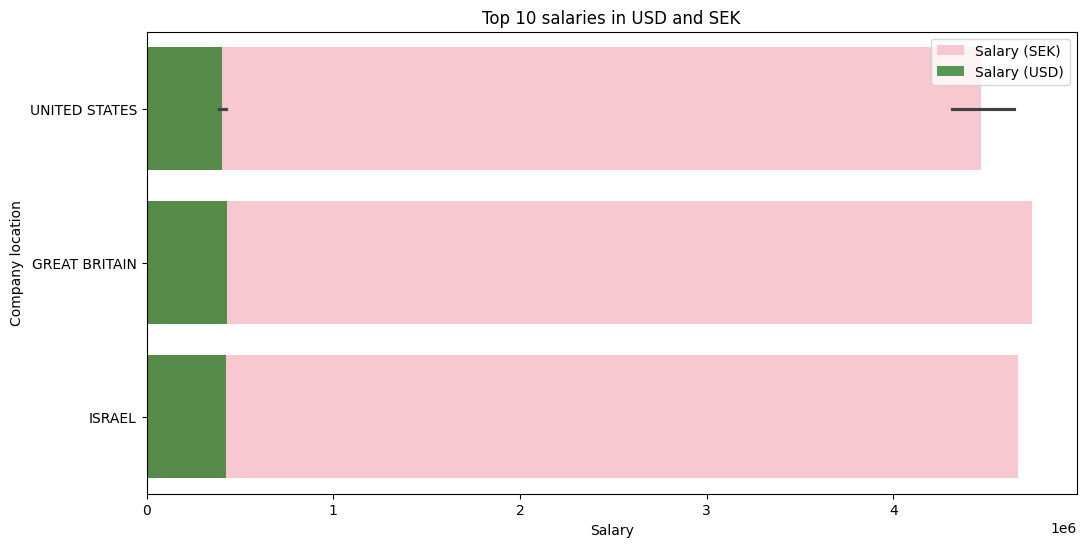

In [7]:
df_top_10 = df.sort_values(by='salary_in_sek', ascending=False).head(10)
plt.figure(figsize=(12, 6))

sns.barplot(data=df_top_10, x='salary_in_sek', y='company_location', color='pink', label='Salary (SEK)')
sns.barplot(data=df_top_10, x='salary_in_usd', y='company_location', color='green', alpha=0.7, label='Salary (USD)')

plt.xlabel('Salary')
plt.ylabel('Company location')
plt.title('Top 10 salaries in USD and SEK')
plt.legend()

plt.show()

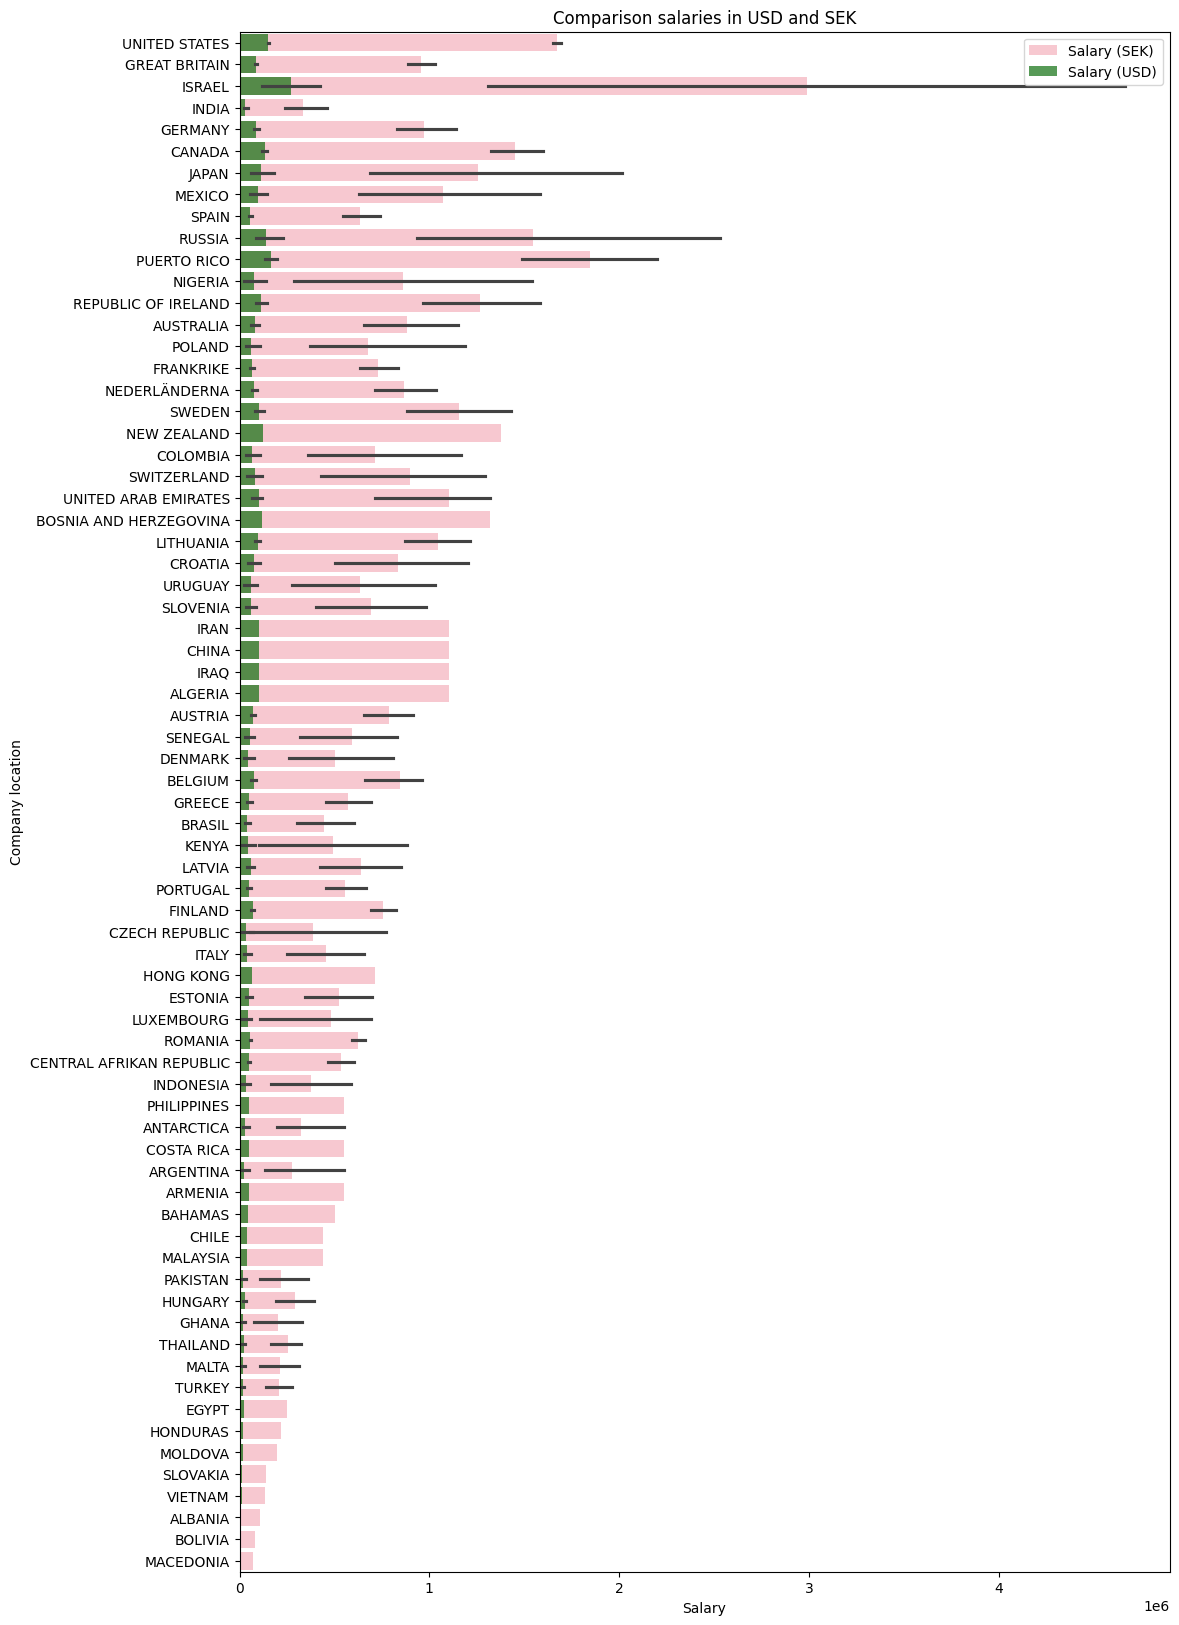

In [8]:
df = df.sort_values(by='salary_in_sek', ascending=False)

plt.figure(figsize=(12, 20))

sns.barplot(data=df, x='salary_in_sek', y='company_location', color='pink', label='Salary (SEK)')
sns.barplot(data=df, x='salary_in_usd', y='company_location', color='green', alpha=0.7, label='Salary (USD)')

plt.xlabel('Salary')
plt.ylabel('Company location')
plt.title('Comparison salaries in USD and SEK')
plt.legend()

plt.show()

In [9]:
df_top_10 =df.nlargest(10, 'salary_in_sek')

fig = px.bar(df_top_10, x='company_location', y='salary_in_sek',
             title='Top 10 salaries in SEK',
             labels={'salary_in_sek': 'Salary (SEK)', 'company_location': 'Company Location'},
             color='company_location', 
             barmode='group')

fig.show()